Traffic Data Analysis Report


The analysis of traffic data collected over a period of time. The data includes information on traffic volume, vehicle types, traffic situations, and timestamps. The analysis aims to identify patterns and insights regarding traffic flow.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## Data loading


In [7]:
df = pd.read_excel('TrafficDataset.xlsx')
display(df.head())
print(df.shape)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,00:00:00,2023-10-10 00:00:00,Tuesday,13,2,2,24,41,normal
1,00:15:00,2023-10-10 00:00:00,Tuesday,14,1,1,36,52,normal
2,00:30:00,2023-10-10 00:00:00,Tuesday,10,2,2,32,46,normal
3,00:45:00,2023-10-10 00:00:00,Tuesday,10,2,2,36,50,normal
4,01:00:00,2023-10-10 00:00:00,Tuesday,11,2,1,34,48,normal


(2976, 9)


## Data cleaning

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Data type conversion
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')  # Changed format to '%d/%m/%Y' to match the actual date format in the data. Added errors='coerce' to handle any potential parsing errors.
df['Time'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d').fillna('') + ' ' + df['Time'].astype(str), errors='coerce') # Handle potential NaT values and convert to datetime objects
for col in ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(int) # Handle potential errors in numeric columns
print("\nData types after conversion:\n", df.info())

# Remove duplicates
original_rows = len(df)
df.drop_duplicates(inplace=True)
final_rows = len(df)
rows_removed = original_rows - final_rows
print(f"\nOriginal number of rows: {original_rows}")
print(f"Final number of rows: {final_rows}")
print(f"Number of duplicate rows removed: {rows_removed}")

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               2976 non-null   datetime64[ns]
 1   Date               2976 non-null   datetime64[ns]
 2   Day of the week    2976 non-null   object        
 3   CarCount           2976 non-null   int32         
 4   BikeCount          2976 non-null   int32         
 5   BusCount           2976 non-null   int32         
 6   TruckCount         2976 non-null   int32         
 7   Total              2976 non-null   int32         
 8   Traffic Situation  2976 non-null   object        
dtypes: datetime64[ns](2), int32(5), object(2)
memory usage: 151.3+ KB

Data types after conversion:
 None

Original number of rows: 2976
Final number of rows: 2976
Number of duplicate rows removed: 0


The raw traffic data was first cleaned and prepared for analysis. This involved checking missing values which none was found, converting datetime data types to appropriate formats, and checked for duplicate entries which none was found .

## Data wrangling



In [9]:
# Standardize 'Day of the week' column
days = {
    "Monday": "Monday",
    "Tuesday": "Tuesday",
    "Wednesday": "Wednesday",
    "Thursday": "Thursday",
    "Friday": "Friday",
    "Saturday": "Saturday",
    "Sunday": "Sunday",
    "Mon": "Monday",
    "Tue": "Tuesday",
    "Wed": "Wednesday",
    "Thu": "Thursday",
    "Fri": "Friday",
    "Sat": "Saturday",
    "Sun": "Sunday"
}

# Convert 'Time' column to datetime objects
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

# Recombine 'Date' and 'Time' into 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'].astype(str))

# Derive Traffic Level
threshold = 200
df['Traffic Level'] = df['Total'].apply(lambda x: "High" if x > threshold else "Low")

# Verify the data types of the columns
print(df.dtypes)

display(df.head())

Time                         object
Date                 datetime64[ns]
Day of the week              object
CarCount                      int32
BikeCount                     int32
BusCount                      int32
TruckCount                    int32
Total                         int32
Traffic Situation            object
DateTime             datetime64[ns]
Traffic Level                object
dtype: object


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,DateTime,Traffic Level
0,00:00:00,2023-10-10,Tuesday,13,2,2,24,41,normal,2023-10-10 00:00:00,Low
1,00:15:00,2023-10-10,Tuesday,14,1,1,36,52,normal,2023-10-10 00:15:00,Low
2,00:30:00,2023-10-10,Tuesday,10,2,2,32,46,normal,2023-10-10 00:30:00,Low
3,00:45:00,2023-10-10,Tuesday,10,2,2,36,50,normal,2023-10-10 00:45:00,Low
4,01:00:00,2023-10-10,Tuesday,11,2,1,34,48,normal,2023-10-10 01:00:00,Low


Standardized day names ensure consistency, and converted 'Time' to datetime objects, enabling time-based calculations. Combined 'Date' and 'Time' into a 'DateTime' column, facilitating temporal analysis. Derived a new 'Traffic Level' feature based on total traffic, providing categorical insights. Verified data types and previews the transformed data.

## Data visualization


C:\Users\USER\AppData\Local\Temp\ipykernel_3760\2928808931.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  traffic_by_day = df.groupby('Day of the week')['Total'].mean()


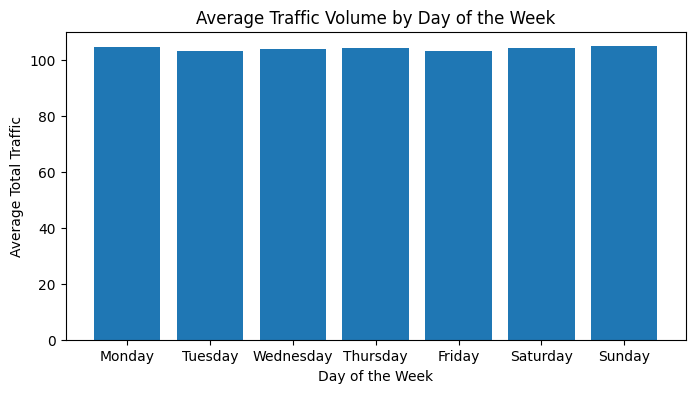

In [13]:

#Traffic by Day of the Week (Bar Chart)
plt.figure(figsize=(8, 4))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=day_order, ordered=True)
traffic_by_day = df.groupby('Day of the week')['Total'].mean()
plt.bar(traffic_by_day.index, traffic_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Traffic')
plt.title('Average Traffic Volume by Day of the Week')
plt.show()

 Analysis of the average traffic volume by day of the week reveals that the average total traffic did not significantly change depending on the day of the week. Traffic volume remained relatively consistent across all days, indicating a uniform distribution. This pattern suggests that no particular day experiences significantly higher or lower traffic compared to other days of the week.

['normal' 'low' 'heavy' 'high']


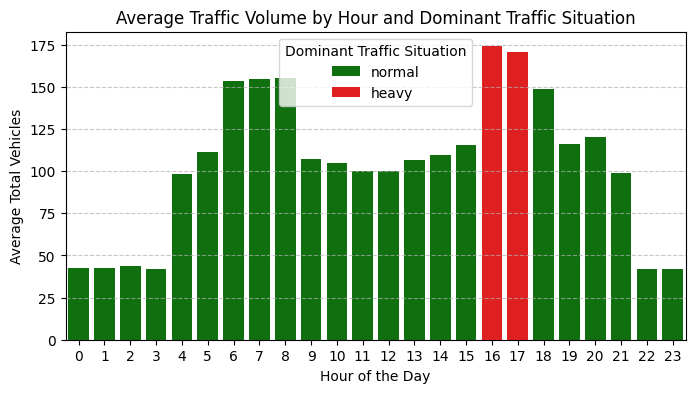

In [14]:
unique_traffic_situations = df['Traffic Situation'].unique()
print(unique_traffic_situations)


# Extract the hour from the 'DateTime' column
df['Hour'] = df['DateTime'].dt.hour



# Group by hour and get the most frequent Traffic Situation
hourly_dominant_traffic = df.groupby('Hour')['Traffic Situation'].agg(lambda x: x.mode()[0]).reset_index()

hourly_average_traffic = df.groupby('Hour')['Total'].mean().reset_index()

# Merge the two DataFrames on 'Hour'
combined_traffic_data = pd.merge(hourly_average_traffic, hourly_dominant_traffic, on='Hour')


# Define colors for traffic situations
traffic_colors = {'normal': 'green', 'heavy': 'red'}

# Create the bar chart
plt.figure(figsize=(8, 4))
# Changed 'y' to 'Total' and 'hue' to 'Traffic Situation' to match column names in combined_traffic_data
sns.barplot(x='Hour', y='Total', hue='Traffic Situation',
            data=combined_traffic_data, palette=traffic_colors)

# Customize the chart
plt.title('Average Traffic Volume by Hour and Dominant Traffic Situation')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Vehicles')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.legend(title='Dominant Traffic Situation')
plt.show()



The average hourly vehicle count exceeds 100 between 5:00 AM and 9:00 PM, suggesting this period as the most active time of day. Furthermore, the count surpasses 150 vehicles between 6:00 AM and 8:00 AM and again between 4:00 PM and 6:00 PM, indicating peak traffic hours. This heightened activity likely explains the heavy traffic observed between 4:00 PM and 5:00 PM, potentially attributed to the evening rush hour.

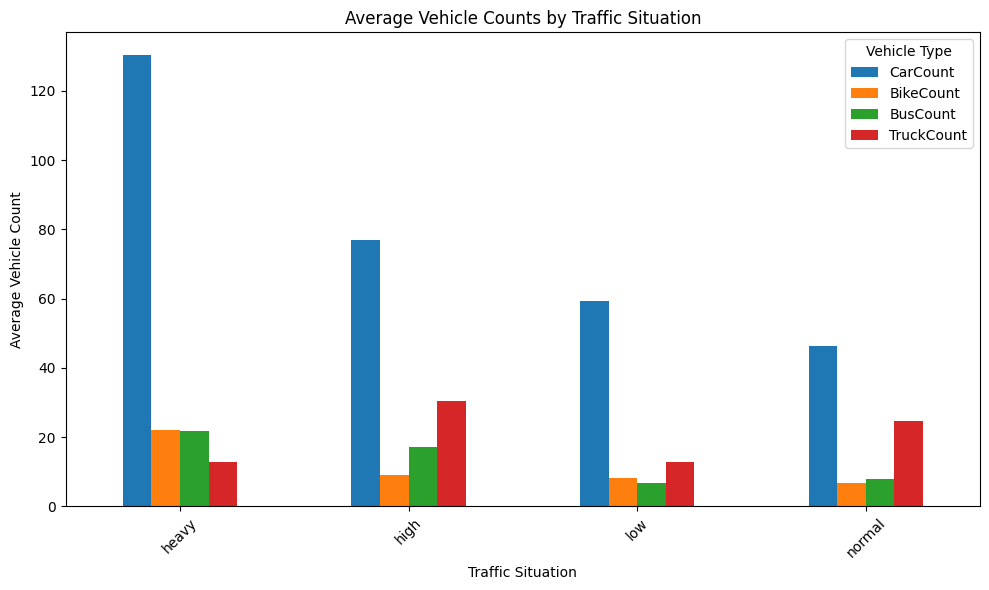

In [15]:
# Group data by traffic situation and vehicle types
traffic_by_vehicle = df.groupby('Traffic Situation')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean()

# Visualize the relationship
traffic_by_vehicle.plot(kind='bar', figsize=(10, 6))
plt.title('Average Vehicle Counts by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Average Vehicle Count')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.show()

The car count is the highest in each traffic situation, particularly in heavy traffic, surpassing 120 vehicles. Heavy traffic situations also see a high number of trucks, around 40